# Gradient Descent Implementation
- Using **Gradient Descent** algorithm to find out the value of **Coefficient (m)** and **Intercept (c)**\
  and compare them with **sklearn Lenier_Regression**, **m** and **c**.
  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("test_scores.csv")
df.head(5)

,name,math,cs
0,david,92,98
1,laura,56,68
2,sanjay,88,81
3,wei,70,80
4,jeff,80,83


In [3]:
x = np.array(df.math)
y = np.array(df.cs)
x,y

(array([92, 56, 88, 70, 80, 49, 65, 35, 66, 67]),
 array([98, 68, 81, 80, 83, 52, 66, 30, 68, 73]))

## Formulas
- y = mx + c
- Mean Squared Error(mse) = (1/n) ∑ (y-(mx+c))^2
- ∂/∂m = -(2/n) ∑ x(y-(mx+c))
- ∂/∂c = -(2/n) ∑ (y-(mx+c))
- m = m-∝(learning ratr)(∂/∂m)
- c = c-∝(learning ratr)(∂/∂c)



In [8]:
def gradient_descent(x,y):
    m = 0    ## Coefficient
    c = 0    ## Intercept
    n = len(x)    ## Number of training examples
    l_rate = 0.0002    ## Learning Rate
    
    mse_privious = 0
    
    plt.scatter(x,y,color="r",marker="+",linewidths=2 )
    
    for i in range(1000000):
        y_pre = m*x + c
        mse = (1/n)*sum(value**2 for value in (y-y_pre))    ## Mean Squared Error
        dm = -(2/n)*sum(x*(y-y_pre))
        dc = -(2/n)*sum(y-y_pre)
        # plt.plot(x,y_pre,"g--")    ## Ploting the lines
        m = m - l_rate*dm
        c = c - l_rate*dc
        if math.isclose(mse,mse_privious, rel_tol=1e-20 ):
            break
        mse_privious = mse
        # print(f"m:{m}, c:{c}, mse:{mse}")
    plt.plot(x,y_pre,"r--")
    plt.title("Best Fit Line Using Gradient_Descent")
    plt.show()
    return (f"Using gradient descent function: Coef {m} Intercept {c}")

## using sklearn
def predict_using_sklean():
    df = pd.read_csv("test_scores.csv")
    reg = LinearRegression()
    reg.fit(df[["math"]],df.cs)
    return (f"Using sklearn: Coef {reg.coef_} Intercept {reg.intercept_}")

### Ploting the Best Fit Line

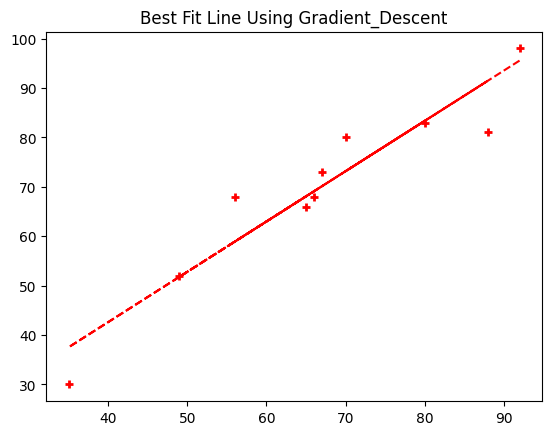

('Using gradient descent function: Coef 1.0177381667350405 Intercept 1.9150826165722297',
 'Using sklearn: Coef [1.01773624] Intercept 1.9152193111568891')

In [9]:
gradient_descent(x,y),\
predict_using_sklean()

### Final Result
- **Gradient descent:-** **Coef :** 1.0177381667350405, **Intercept :** 1.9150826165722297'\
  **sklearn:-** **Coef :** 1.01773624, **Intercept :** 1.9152193111568891

- In both cases coefficient and intercept are identical